# Menyelesaikan Permasalahan Marketing Suatu Bank Portugal

- Nama: Arvin Surya Wibowo
- Email: arsuya16@gmail.com
- Linkedin: https://www.linkedin.com/in/arvinwibowo/

Sumber data: https://archive.ics.uci.edu/dataset/222/bank+marketing

# Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import resample

import pickle

### Menyiapkan data yang akan diguankan

## Data Understanding

Pertanyaan yang akan dicari jawabannya dalan proyek ini

- Apa faktor yang menyebabkan client berlangganan deposito berjangka ?

Dataset ini memiliki keterangan seperti berikut:

- age - (Numerical)

- job - type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

- marital - marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

- education - (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

- balance - average yearly balance		

- housing - has housing loan?	

- loan - has personal loan?	

- contact - contact communication type (categorical: 'cellular','telephone')

- day_of_week - Last contact day of the week

- month - last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- duration - last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.	

- campaign - number of contacts performed during this campaign and for this client (numeric, includes last contact)

- pdays - number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

- previous - number of contacts performed before this campaign and for this client

- poutcome - outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')	

- emp.var.rate - tidak diketahui

- cons.price.idx - tidak diketahui

- cons.conf.idx - tidak diketahui

- euribor3m - tidak diketahui

- nr.employed - tidak diketahui

- y - (Target) has the client subscribed a term deposit?	

## Data Preparation / Preprocessing

Ada 2 file data:
1. bank-additional-full.csv akan menjadi data training
2. bank-additional.csv akan menjadi data testing 

Karena fitur `duration` seharusnya tidak diketahui sebelum hasilnya keluar dan disarankan untuk tidak dipakai maka fitur ini akan di drop

In [42]:
df = pd.read_excel('data/bank-additional-full.xlsx')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no


In [43]:
df = df.drop(columns='duration')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no


In [44]:
# Mengecek data kosong
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [45]:
# Mengecek data duplikat
df.duplicated().any()

True

In [46]:
df.shape

(41188, 20)

In [47]:
# Menghapus data duplikat
df = df.drop_duplicates()

In [48]:
df.shape

(39404, 20)

In [49]:
# Mengecek informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  object 
 2   marital         39404 non-null  object 
 3   education       39404 non-null  object 
 4   default         39404 non-null  object 
 5   housing         39404 non-null  object 
 6   loan            39404 non-null  object 
 7   contact         39404 non-null  object 
 8   month           39404 non-null  object 
 9   day_of_week     39404 non-null  object 
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  int64  
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  object 
 14  emp.var.rate    39404 non-null  float64
 15  cons.price.idx  39404 non-null  float64
 16  cons.conf.idx   39404 non-null  float64
 17  euribor3m       39404 non-null  floa

In [50]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,39404.000000,39404,39404,39404,39404,39404,39404,39404,39404,39404,39404.000000,39404.000000,39404.000000,39404,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,9873,23869,11561,31135,20561,32248,24673,13315,8197,NaN,NaN,NaN,33858,NaN,NaN,NaN,NaN,NaN,34806
mean,40.116105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.618744,960.847097,0.178738,NaN,0.064067,85475.233575,-40.499604,3155.597041,5165.986481,NaN
std,10.460328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.814780,190.869184,0.503172,NaN,1.577041,26366.809996,4.644327,2093.406938,72.763866,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,-3.400000,93.200000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,999.000000,0.000000,NaN,-1.800000,92893.000000,-42.700000,1281.000000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,999.000000,0.000000,NaN,1.100000,93798.000000,-41.800000,4856.000000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,999.000000,0.000000,NaN,1.400000,93994.000000,-36.400000,4961.000000,5228.100000,NaN


Feature Engineering

In [51]:
df['default'].value_counts()

default
no         31135
unknown     8266
yes            3
Name: count, dtype: int64

Fitur `default` memiliki nilai unknown yang banyak sehingga nilainya tidak jelas, selain itu nilainya terlalu timpang sehingga lebih baik dihapus

In [52]:
df = df.drop(columns='default')
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no


In [53]:
# Fitur apakah klien bekerja di sektor layanan
service_jobs = ['admin.', 'services', 'technician', 'management']
df['is_service_job'] = df['job'].isin(service_jobs).astype(int)
df['is_service_job'].value_counts()

is_service_job
1    22898
0    16506
Name: count, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  object 
 2   marital         39404 non-null  object 
 3   education       39404 non-null  object 
 4   housing         39404 non-null  object 
 5   loan            39404 non-null  object 
 6   contact         39404 non-null  object 
 7   month           39404 non-null  object 
 8   day_of_week     39404 non-null  object 
 9   campaign        39404 non-null  int64  
 10  pdays           39404 non-null  int64  
 11  previous        39404 non-null  int64  
 12  poutcome        39404 non-null  object 
 13  emp.var.rate    39404 non-null  float64
 14  cons.price.idx  39404 non-null  float64
 15  cons.conf.idx   39404 non-null  float64
 16  euribor3m       39404 non-null  float64
 17  nr.employed     39404 non-null  floa

In [55]:
# Fitur is_service_job seharusnya bertipe categorical, sehingga akan diubah ke categorical
df['is_service_job'] = df['is_service_job'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  object 
 2   marital         39404 non-null  object 
 3   education       39404 non-null  object 
 4   housing         39404 non-null  object 
 5   loan            39404 non-null  object 
 6   contact         39404 non-null  object 
 7   month           39404 non-null  object 
 8   day_of_week     39404 non-null  object 
 9   campaign        39404 non-null  int64  
 10  pdays           39404 non-null  int64  
 11  previous        39404 non-null  int64  
 12  poutcome        39404 non-null  object 
 13  emp.var.rate    39404 non-null  float64
 14  cons.price.idx  39404 non-null  float64
 15  cons.conf.idx   39404 non-null  float64
 16  euribor3m       39404 non-null  float64
 17  nr.employed     39404 non-null  floa

In [56]:
# Rasio kontak
df['contact_rate'] = df['previous'] / (df['campaign'] + df['previous'])
df['contact_rate'].value_counts()

contact_rate
0.000000    33858
0.500000     2476
0.333333     1309
0.250000      458
0.666667      411
0.200000      224
0.166667      115
0.750000      111
0.142857       94
0.400000       83
0.600000       61
0.125000       41
0.800000       36
0.111111       29
0.285714       22
0.428571       14
0.833333       11
0.100000        9
0.571429        7
0.222222        5
0.090909        5
0.714286        3
0.625000        3
0.375000        3
0.076923        2
0.857143        2
0.083333        2
0.181818        1
0.416667        1
0.058824        1
0.071429        1
0.300000        1
0.153846        1
0.444444        1
0.133333        1
0.062500        1
0.875000        1
Name: count, dtype: int64

In [57]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,is_service_job,contact_rate
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no,0,0.0
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no,1,0.0
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no,1,0.0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no,1,0.0
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no,1,0.0


Exploratory Data Analysis

In [58]:
# Melihat semua data yang memiliki tipe data kategori
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical.remove('y')
categorical

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'is_service_job']

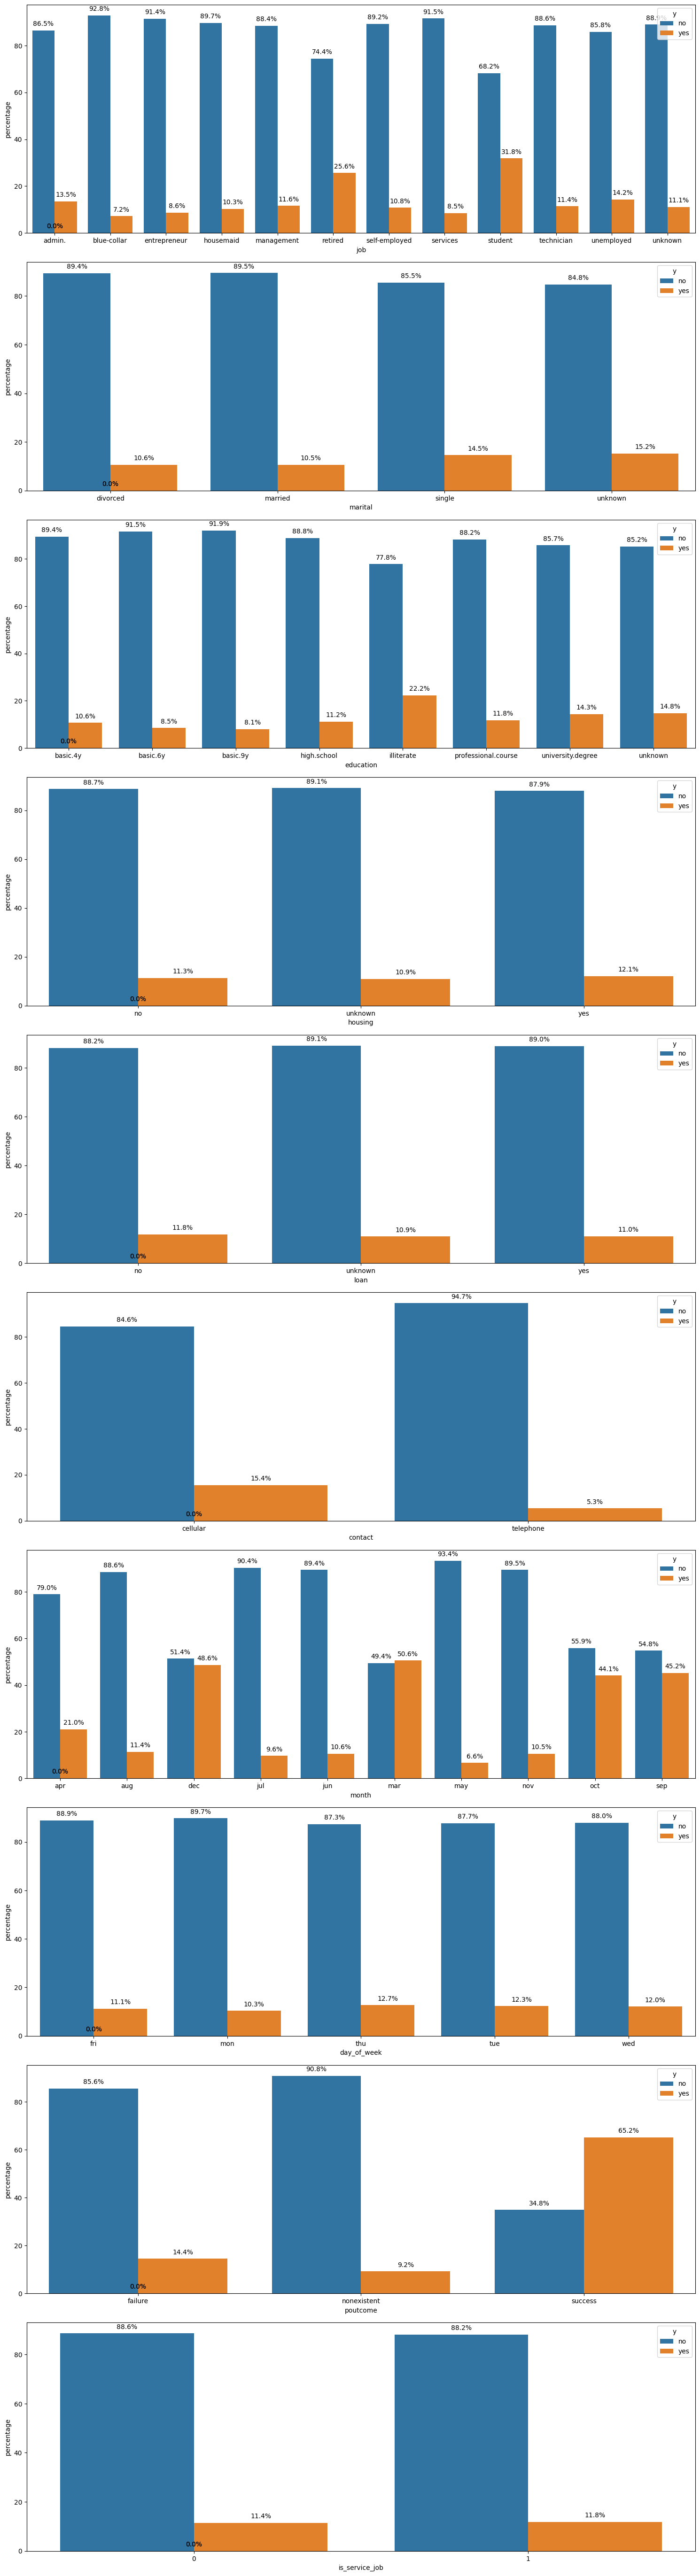

In [59]:
# Fungsi untuk plot kategori dengan persentase
def categoricalPlot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1, figsize=(15, 55))

    # Iterasi melalui setiap feature untuk membuat plot
    for i, feature in enumerate(features):
        # Menghitung persentase
        data = df.groupby([feature, segment_feature]).size().reset_index(name='counts')
        total_counts = df[feature].value_counts().reset_index()
        total_counts.columns = [feature, 'total']
        data = data.merge(total_counts, on=feature)
        data['percentage'] = (data['counts'] / data['total']) * 100

        # Plot dengan hue jika segment_feature tersedia
        sns.barplot(data=data, x=feature, y='percentage', hue=segment_feature, ax=ax[i])

        # Tambahkan teks persentase di atas setiap bar dalam plot
        for p in ax[i].patches:
            height = p.get_height()
            ax[i].annotate(f'{height:.1f}%', 
                           (p.get_x() + p.get_width() / 2., height), 
                           ha='center', va='center', 
                           xytext=(0, 10), 
                           textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Contoh penggunaan fungsi categoricalPlot_percentage
categoricalPlot(
    features=categorical,
    df=df,
    segment_feature='y'
)

Berdasarkan plot data categorical, kita dapat mengetahui informasi bahwa:
1. Persentase 3 Pekerjaan yang paling banyak berlangganan deposito adalah student, retired, dan unemployed
2. Persentase orang yang berlangganan deposito dan diketahui adalah orang yang belum menikah
3. Persentase 2 tingkat education yang paling banyak berlangganan deposit adalah illiterate dan university degree
4. Persentase orang yang berlangganan deposito adalah orang yang mempunyai pinjaman rumah
5. Persentase orang yang berlangganan deposito adalah orang yang tidak mempunyai pinjaman pribadi
6. Persentase orang yang berlangganan deposito adalah orang yang memakai cellular
7. Persentase 3 last contact month dalam setahun yang paling banyak berlangganan deposito adalah bulan maret, desember, dan september
8. Uniknya, pada bulan maret persentase orang yang berlangganan deposito (50,6%) lebih banyak daripada yang tidak (49,4%)
8. Persentase 3 last contact day of the week yang paling banyak berlangganan deposito adalah hari kamis, selasa, dan rabu
9. previous marketing campaign yang dahulu berhasil untuk menarik orang untuk berlangganan deposito 
10. Persentase orang yang berlangganan deposito lebih banyak bekerja di sektor layanan

In [60]:
numerical = df.select_dtypes(include=[np.number]).columns.to_list()
numerical

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'contact_rate']

In [61]:
df['pdays'].value_counts()

pdays
999    37890
3        438
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

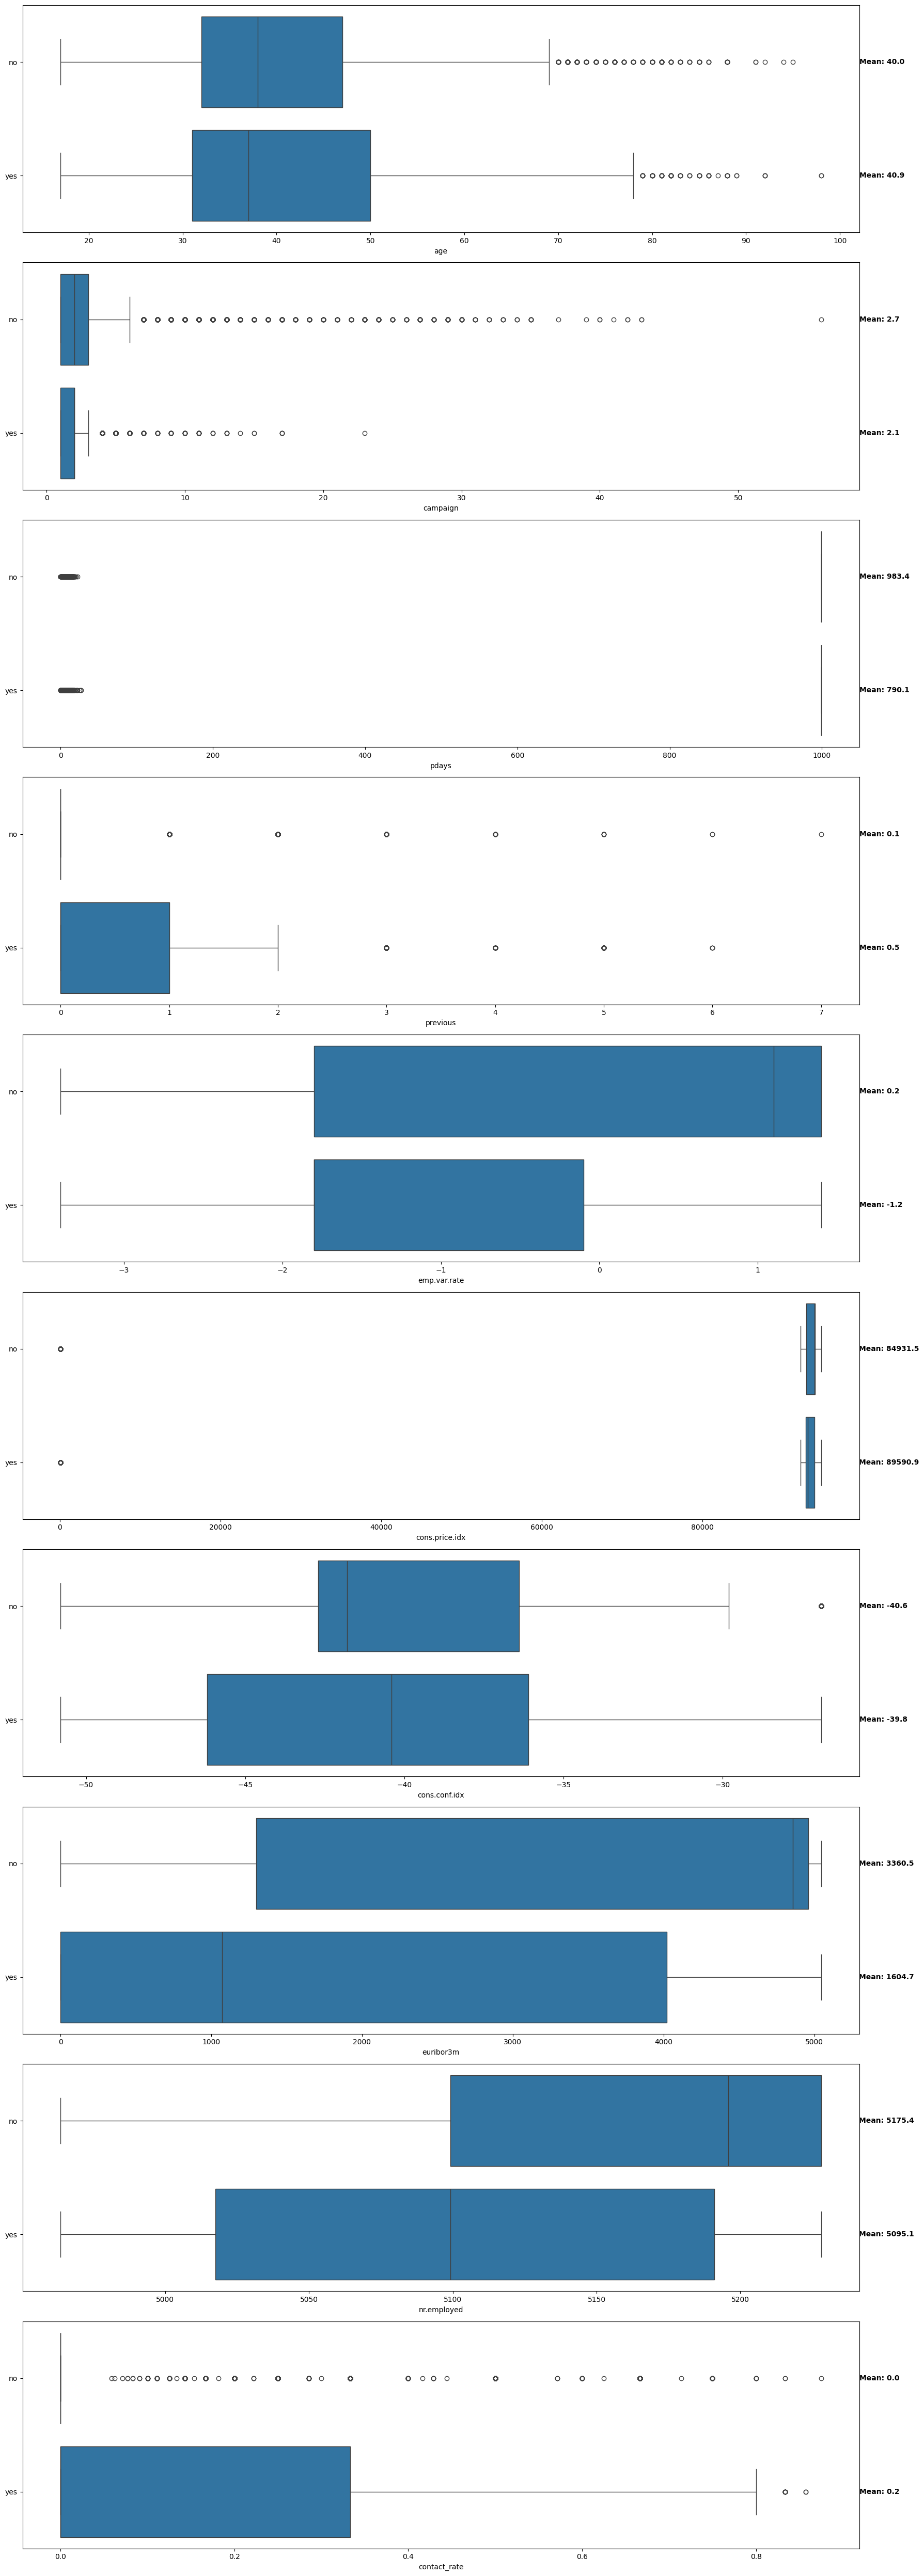

In [62]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):

    fig, ax = plt.subplots(len(features), 1, figsize=(18, 50))

    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)

            for tick, label in enumerate(ax[i].get_yticklabels()):
                cat = label.get_text()
                mean_value = df[df[segment_feature] == cat][feature].mean()
                mean_text = f'Mean: {mean_value:.1f}'
                ax[i].text(ax[i].get_xlim()[1], tick, mean_text,
                           verticalalignment='center', size='medium', color='black', weight='semibold')
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
            mean_value = df[feature].mean()
            mean_text = f'Mean: {mean_value:.1f}'
            ax[i].text(ax[i].get_xlim()[1], 0, mean_text,
                       verticalalignment='center', size='medium', color='black', weight='semibold')

    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=numerical,
    df=df,
    segment_feature='y',
    showfliers=True
)

Dari sini ada beberapa data yang perlu diperiksa adalah pdays dan cons.price.idx

In [63]:
df['pdays'].value_counts()

pdays
999    37890
3        438
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

Pada fitur pdays, terdapat nilai yang diluar nilai normal yaitu 999, karena nilai ini yang paling banyak dalam fitur pdays, sehingga fitur ini akan dihapus

In [64]:
df = df.drop(columns='pdays')
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,is_service_job,contact_rate
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no,0,0.0
1,57,services,married,high.school,no,no,telephone,may,mon,1,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no,1,0.0
2,37,services,married,high.school,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no,1,0.0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no,1,0.0
4,56,services,married,high.school,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no,1,0.0


In [65]:
df['cons.price.idx'].value_counts()

cons.price.idx
93994.0    7527
93918.0    6210
92893.0    5576
93444.0    4732
94465.0    4317
93.2       3429
93075.0    2362
92201.0     756
92963.0     700
92431.0     436
92649.0     353
94215.0     311
94199.0     301
92843.0     266
93369.0     264
92379.0     263
94027.0     231
94055.0     228
93876.0     212
94601.0     204
92469.0     177
93749.0     173
92713.0     171
94767.0     128
93798.0      67
92756.0      10
Name: count, dtype: int64

Pada fitur cons.price.idx, terdapat nilai yang diluar nilai normal yaitu 93.2, sehingga nilai ini akan dihapus

In [66]:
df = df[df['cons.price.idx'] != 93.2]
df['cons.price.idx'].value_counts()

cons.price.idx
93994.0    7527
93918.0    6210
92893.0    5576
93444.0    4732
94465.0    4317
93075.0    2362
92201.0     756
92963.0     700
92431.0     436
92649.0     353
94215.0     311
94199.0     301
92843.0     266
93369.0     264
92379.0     263
94027.0     231
94055.0     228
93876.0     212
94601.0     204
92469.0     177
93749.0     173
92713.0     171
94767.0     128
93798.0      67
92756.0      10
Name: count, dtype: int64

In [67]:
numerical = df.select_dtypes(include=[np.number]).columns.to_list()
numerical

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'contact_rate']

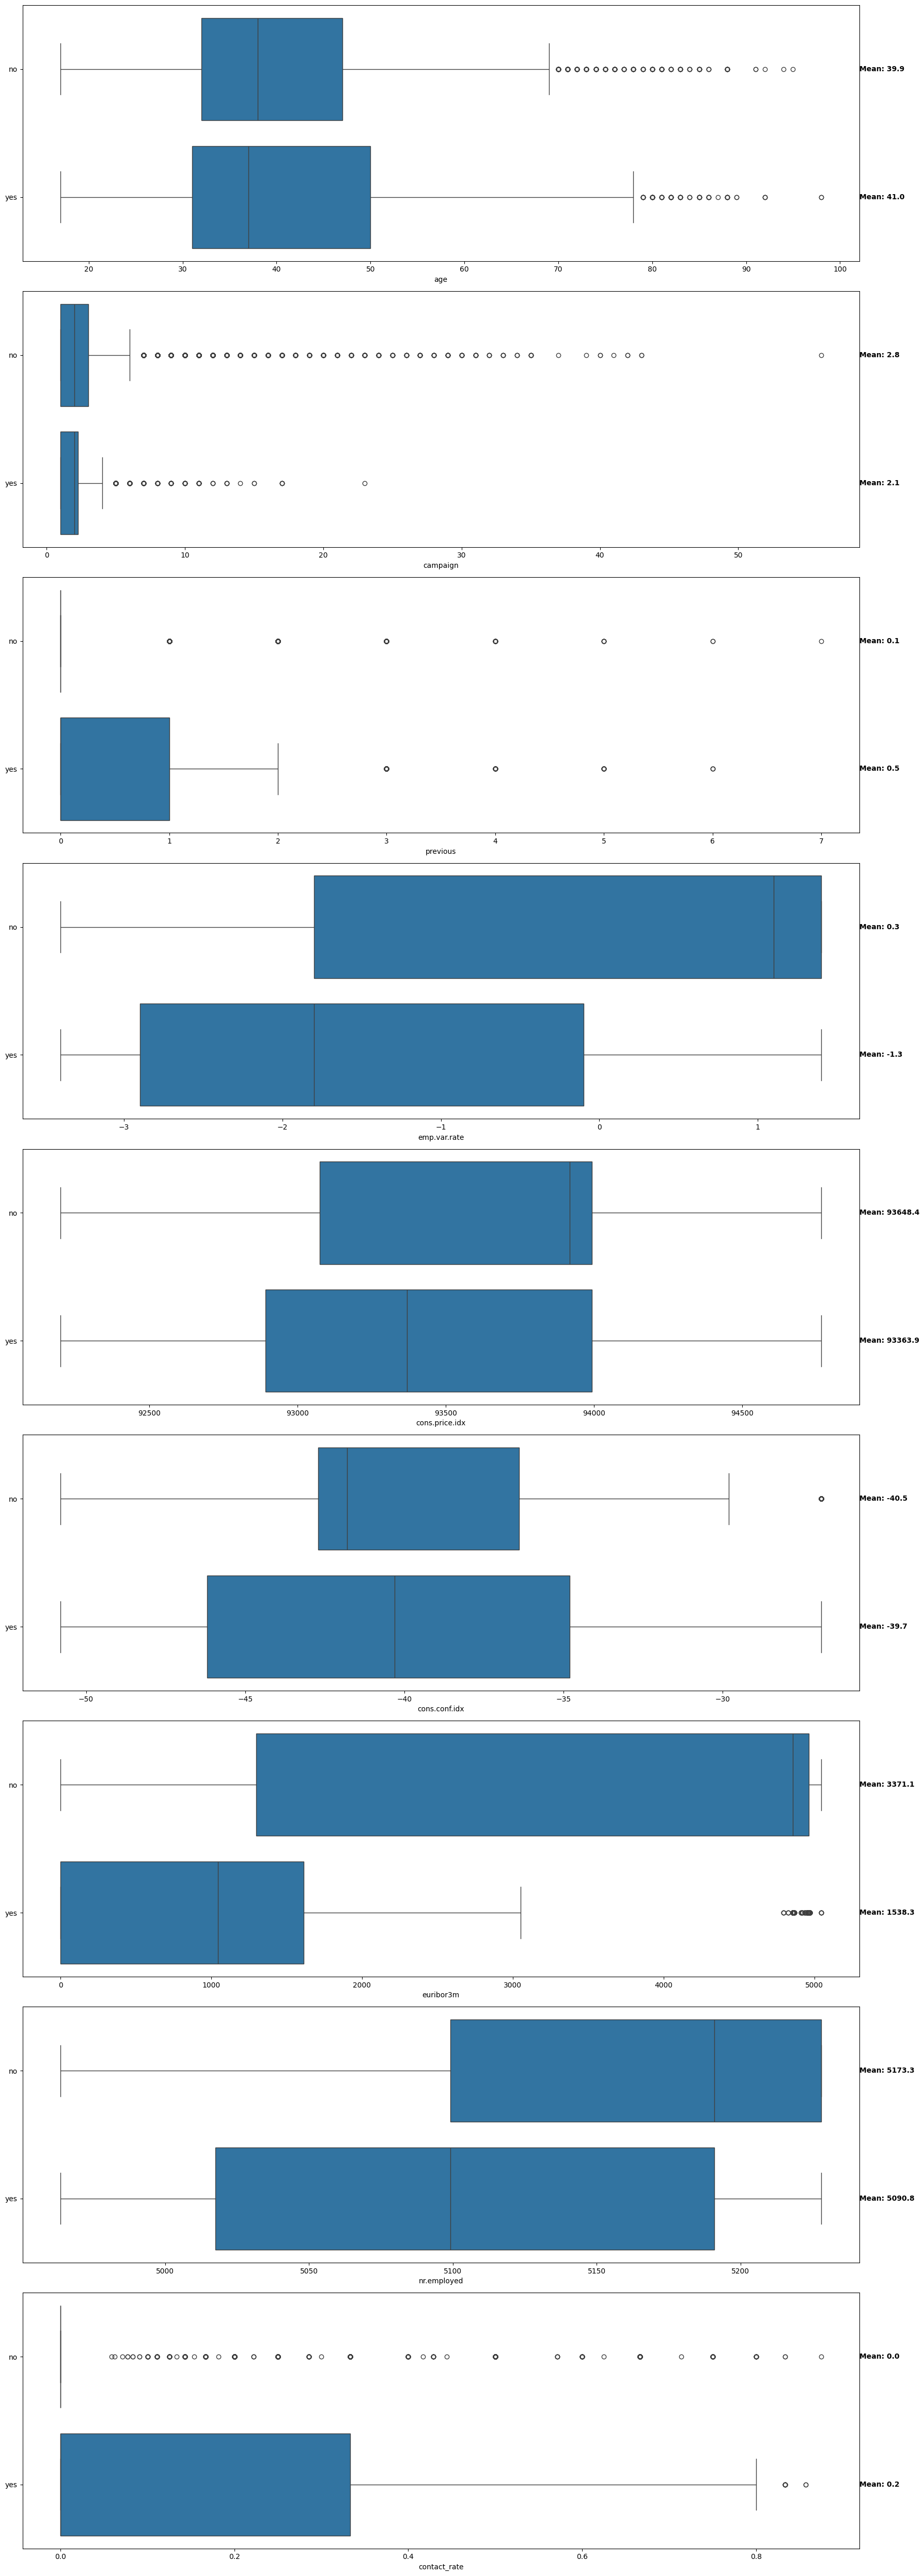

In [68]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):

    fig, ax = plt.subplots(len(features), 1, figsize=(18, 50))

    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)

            for tick, label in enumerate(ax[i].get_yticklabels()):
                cat = label.get_text()
                mean_value = df[df[segment_feature] == cat][feature].mean()
                mean_text = f'Mean: {mean_value:.1f}'
                ax[i].text(ax[i].get_xlim()[1], tick, mean_text,
                           verticalalignment='center', size='medium', color='black', weight='semibold')
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
            mean_value = df[feature].mean()
            mean_text = f'Mean: {mean_value:.1f}'
            ax[i].text(ax[i].get_xlim()[1], 0, mean_text,
                       verticalalignment='center', size='medium', color='black', weight='semibold')

    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=numerical,
    df=df,
    segment_feature='y',
    showfliers=True
)

In [69]:
numerical

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'contact_rate']

In [73]:
df.shape

(35975, 20)

In [74]:
df['previous'].value_counts()

previous
0    31148
1     3767
2      750
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

Fitur `previous` memiliki nilai 0 sebanyak 31148 data dari total data 35975, sehingga kemungkinan besar akan lebih banyak yang hasilnya 0

In [72]:
df['contact_rate'].value_counts()

contact_rate
0.000000    31148
0.500000     2116
0.333333     1085
0.666667      411
0.250000      397
0.200000      190
0.750000      111
0.166667       97
0.142857       84
0.400000       81
0.600000       61
0.800000       36
0.125000       35
0.111111       26
0.285714       22
0.428571       14
0.833333       11
0.100000        9
0.571429        7
0.222222        5
0.090909        4
0.375000        3
0.714286        3
0.625000        3
0.083333        2
0.857143        2
0.076923        2
0.181818        1
0.416667        1
0.058824        1
0.071429        1
0.300000        1
0.153846        1
0.444444        1
0.133333        1
0.062500        1
0.875000        1
Name: count, dtype: int64

Fitur `contact_rate` memiliki nilai 0 sebanyak 31148 data dari total data 35975, sehingga kemungkinan besar akan lebih banyak yang hasilnya 0

Berdasarkan plot data numerical, kita dapat mengetahui informasi bahwa:
1. Rata-rata umur yang berlangganan deposito lebih tinggi (41) dari pada yang tidak (39.9)
2. Rata-rata campaign yang berlangganan deposito lebih rendah (2.1) dari pada yang tidak (2.8)
3. Rata-rata previous yang berlangganan deposito lebih besar (0,5) dari pada yang tidak (0,1), namun perlu diperhatikan juga dari 35975 data ada, ada 31148 data yang bernilai 0, sehingga kemungkinan besar akan lebih banyak yang hasilnya 0
4. Rata-rata emp.var.rate yang berlangganan deposito lebih rendah (-1,3) dari pada yang tidak (0,3)
5. Rata-rata cons.price.idx yang berlangganan deposito lebih rendah (93363,9) dari pada yang tidak (93648,4)
6. Rata-rata cons.conf.idx yang berlangganan deposito lebih tinggi (-39,7) dari pada yang tidak (-40,5)
7. Rata-rata euribor3m yang berlangganan deposito lebih rendah (1538,3) dari pada yang tidak (3371,1)
8. Rata-rata nr.employed yang berlangganan deposito lebih rendah (5090,8) dari pada yang tidak (5173,3)
9. Rata-rata contact_rate yang berlangganan deposito lebih tinggi (0,2) dari pada yang tidak (0), namun perlu diperhatikan juga dari 35975 data ada, ada 31148 data yang bernilai 0, sehingga kemungkinan besar akan lebih banyak yang hasilnya 0

# Modeling

In [77]:
df['y'].value_counts()

y
no     31563
yes     4412
Name: count, dtype: int64

In [78]:
df.shape

(35975, 20)

Perlu diperhatikan bahwa target `y` memiliki data yang timpang dimana nilai no memiliki 31563 data dari 35975 total data, sehingga kemungkinan besar hasil prediksi nantinya lebih banyak adalah no

In [79]:
# melakukan train-test-split
X = df.drop(columns='y')
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28780, 19), (7195, 19), (28780,), (7195,))

In [82]:
# Menentukan nilai ordinal
ordinal = ['education']
ordinal

['education']

In [80]:
# Menentukan nilai nominal
nominal = categorical
nominal.remove

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'is_service_job']

In [81]:
# Menentukan nilai numerical
numerical

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'contact_rate']